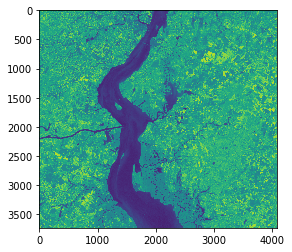

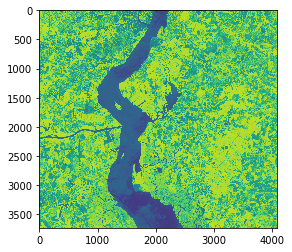

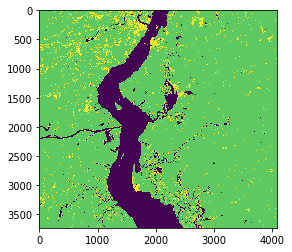

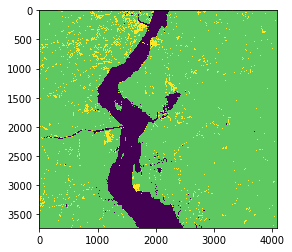

In [28]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

def ndvi(band4, band8):
    ndvi = (band8.astype(float) - band4.astype(float)) / (band8 + band4)
    return ndvi
    
    
def clusters(ndvi_image):
    copy_image = ndvi_image.copy()
    sz = ndvi_image.shape
    rows = sz[0]
    cols = sz[1]
    for i in range(rows):
        for j in range(cols):
            if (copy_image[i][j] >= -0.75 and copy_image[i][j] <= -0.15):
                copy_image[i][j] = -1
            elif (copy_image[i][j] >= -0.1 and copy_image[i][j] <= 0.1):
                copy_image[i][j] = 1
            else:
                copy_image[i][j] = 0.5
    show(copy_image)
    return copy_image


def show_image(cluster_image):
    copy_image = cluster_image.copy()
    sz = copy_image.shape
    rows = sz[0]
    cols = sz[1]
    for i in range(rows):
        for j in range(cols):
            copy_image[i][j] = round((copy_image[i][j] + 1) * 127.5)
    image = Image.fromarray(copy_image.reshape((copy_image.shape[0], copy_image.shape[1])).astype('uint8'))
    imshow(image)

    
def image_normilize(img1, img2):
    m1 = np.mean(img1)
    m2 = np.mean(img2)
    sig1 = np.std(img1)
    sig2 = np.std(img2)
    img_copy = img2.copy()
    for i in range(img_copy.shape[0]):
        for j in range(img_copy.shape[1]):
            img_copy[i][j] = (sig1 / sig2) * (img2[i][j] - m2) + m1
    return img_copy

def image_differencing(img1, img2):
    clusters_diff = img1.copy()
    for i in range(clusters_diff.shape[0]):
        for j in range(clusters_diff.shape[1]):
            if img1[i][j] != img2[i][j]:
                clusters_diff[i][j] = img2[i][j]
            else:
                clusters_diff[i][j] = 1
    return clusters_diff

#загрузка изображений
dataset = rasterio.open('/home/yulya/2015-11-13_B04_crop')
band4_2015 = dataset.read(1)
dataset = rasterio.open('/home/yulya/2015-11-13_B08_crop')
band8_2015 = dataset.read(1)

dataset = rasterio.open('/home/yulya/2018-07-10_B04_crop')
band4_2018 = dataset.read(1)
dataset = rasterio.open('/home/yulya/2018-07-10_B08_crop')
band8_2018 = dataset.read(1)

#применение NDVI индекса
ndvi_2015 = ndvi(band4_2015, band8_2015)
ndvi_2018 = ndvi(band4_2018, band8_2018)
show(ndvi_2015)
show(ndvi_2018)

#разбиение на кластеры
clusters_2015 = clusters(ndvi_2015)
clusters_2018 = clusters(ndvi_2018)